In [1]:
import uproot
import numpy as np

import matplotlib.pyplot as plt

In [3]:
with uproot.open("../Outputfiles/out_1_GeV.root") as f:
    for k in f:
        print(k)
        try:
            for kk in f[k]:
                print(kk)
        except:
            pass
        
    #print(f.describe())

        

FileNotFoundError: [Errno 2] No such file or directory: '/home/leo/master-thesis/SimDef/ana/../Outputfiles/out_1_GeV.root'

['NEvent', 'Tracker_NHit_X_0', 'Tracker_NHit_Y_0', 'Tracker_NHit_X_1', 'Tracker_NHit_Y_1', 'Tracker_X_0', 'Tracker_Y_0', 'Tracker_X_1', 'Tracker_Y_1', 'GammaCal_EDep_CC', 'GammaCal_EDep_TL', 'GammaCal_EDep_TR', 'GammaCal_EDep_BL', 'GammaCal_EDep_BR', 'GammaCal_EDep_CL', 'GammaCal_EDep_CR', 'CrystalA_EDep', 'CrystaB_EDep', 'CrystalC_EDep']
['EvID', 'PDGEncoding', 'ParticleID', 'totEnergy']
0
<TBranch 'NEvent' at 0x7fe991264fd0>


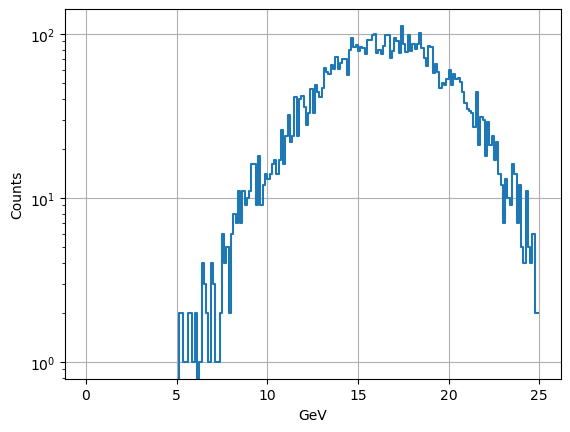

In [2]:
#%% Importo dati 


#data_path = '../Outputfiles/out_146_GeV.root'

data_path = '../CERN2022-build/out_data/tbeamdata0000.root'

data = uproot.open(data_path)["outData"]

data_loss = uproot.open(data_path)["EnergyDep"]

ph_loss = np.array(data_loss['totEnergy'])

ph_crys  = np.array(data["CrystalA_EDep"])

#ph_crys = np.array(uproot.open(data_path)["CrystalA_EDep"])



print(data.keys())

print(data_loss.keys())


print(len(ph_loss))

print(data['NEvent'])

#ph = np.sum(np.array(data['GammaCal_EDep_CC']), np.array(data['GammaCal_EDep_CL']), np.array(data['GammaCal_EDep_CR']), np.array(data['GammaCal_EDep_BL']), np.array(data['GammaCal_EDep_BR'],
#np.array(data['GammaCal_EDep_TL']), np.array(data['GammaCal_EDep_TR'] )))

ph = np.array([sum(x) for x in zip(np.array(data['GammaCal_EDep_CC']), np.array(data['GammaCal_EDep_CL']), np.array(data['GammaCal_EDep_CR']), np.array(data['GammaCal_EDep_BL']), np.array(data['GammaCal_EDep_BR']),
np.array(data['GammaCal_EDep_TL']), np.array(data['GammaCal_EDep_TR'] ))])
#ph = np.array(data['GammaCal_EDep_CC'])



fig, ax = plt.subplots()

h, bins = np.histogram(ph_crys, bins = 200, range = [0,25]) 

binc = bins[:-1]+(bins[1]-bins[0])/2

ax.plot(binc, h, ds = "steps-mid", label='Eergy deposit Gev random orientation')

ax.grid() 

ax.set_xlabel('GeV')

ax.set_ylabel('Counts')

ax.set_yscale('log')

#ax.axvline(110, ls ='--', c = 'k', label = '120 GeV')

#ax.legend(loc = 'upper right')



In [ ]:
np.min(ph_crys)

0.0